In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
import os
os.getcwd()

'C:\\Users\\Bhumika Rao\\data'

In [4]:
customers = pd.read_csv("customers.csv")
categories = pd.read_csv("categories.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_items = pd.read_csv("order_items.csv")
payments = pd.read_csv("payments.csv")

In [5]:
customers.head()

,customer_id,customer_name,email,city,country,signup_date
0,1,Robert Simmons,simpsonjohn@example.com,Matthewburgh,Estonia,2025-03-17
1,2,Jessica Davis,NaN,Phillipsmouth,Senegal,2024-03-14
2,3,Lindsey Fuentes,martinezdylan@example.com,Leetown,Andorra,2022-10-31
3,4,Tim Lowe,robertstiffany@example.net,South Elizabeth,Namibia,2023-12-29
4,5,Michael Warren,olowe@example.net,Port Charles,Guinea,2020-07-04


In [9]:
print("Customers:", customers.shape)
print("Categories:", categories.shape)
print("Products:", products.shape)
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Payments:", payments.shape)

Customers: (20000, 6)
Categories: (8, 2)
Products: (1500, 5)
Orders: (250000, 4)
Order Items: (839963, 4)
Payments: (242594, 5)


In [54]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    20000 non-null  object
 1   customer_name  20000 non-null  object
 2   email          17609 non-null  object
 3   city           20000 non-null  object
 4   country        20000 non-null  object
 5   signup_date    20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839963 entries, 0 to 839962
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   order_item_id  839963 non-null  int64
 1   order_id       839963 non-null  int64
 2   product_id     839963 non-null  int64
 3   quantity       839963 non-null  int64
dtypes: int64(4)
memory usage: 25.6 MB


In [8]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242594 entries, 0 to 242593
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   payment_id      242594 non-null  int64 
 1   order_id        242594 non-null  int64 
 2   payment_method  242594 non-null  object
 3   payment_status  242594 non-null  object
 4   payment_date    223005 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.3+ MB


In [9]:
customers.isnull().sum()

customer_id         0
customer_name       0
email            2391
city                0
country             0
signup_date         0
dtype: int64

In [11]:

tables = {
    "Customers": customers,
    "Orders": orders,
    "Order_Items": order_items,
    "Payments": payments,
    "Products": products,
    "Categories": categories
}
tables



{'Customers':        customer_id      customer_name                       email  \
 0                1     Robert Simmons     simpsonjohn@example.com   
 1                2      Jessica Davis                         NaN   
 2                3    Lindsey Fuentes   martinezdylan@example.com   
 3                4           Tim Lowe  robertstiffany@example.net   
 4                5     Michael Warren           olowe@example.net   
 ...            ...                ...                         ...   
 19995        19996         Laura Cruz       allison51@example.net   
 19996        19997       Kayla Farmer         alexa46@example.net   
 19997        19998        Monica Peck        teresa82@example.net   
 19998        19999        Erica Perez   spenceralicia@example.com   
 19999        20000  Mr. Donald Madden      haleywells@example.net   
 
                   city      country signup_date  
 0         Matthewburgh      Estonia  2025-03-17  
 1        Phillipsmouth      Senegal  2024-

PART 1: Data Understanding & EDA

In [13]:
#1.	How many rows and columns are present in each table?
for name, df in tables.items():
    print(f"{name} table:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("-" * 40)

Customers table:
Rows: 20000, Columns: 6
----------------------------------------
Orders table:
Rows: 250000, Columns: 4
----------------------------------------
Order_Items table:
Rows: 839963, Columns: 4
----------------------------------------
Payments table:
Rows: 242594, Columns: 5
----------------------------------------
Products table:
Rows: 1500, Columns: 5
----------------------------------------
Categories table:
Rows: 8, Columns: 2
----------------------------------------


This code iterates through each table in the tables dictionary and checks its structure. For every table, it prints the table name along with the total number of rows and columns using the shape attribute of the DataFrame. This helps to quickly understand the size of each table before performing further analysis.

In [15]:
#2.	What percentage of missing values exists in each column?
for name, df in tables.items():
    print(f"\n{name} Table - Missing Value Percentage")
    missing_percent = (df.isnull().sum() / len(df)) * 100
    print(missing_percent)


Customers Table - Missing Value Percentage
customer_id       0.000
customer_name     0.000
email            11.955
city              0.000
country           0.000
signup_date       0.000
dtype: float64

Orders Table - Missing Value Percentage
order_id        0.0
customer_id     0.0
order_date      0.0
order_status    0.0
dtype: float64

Order_Items Table - Missing Value Percentage
order_item_id    0.0
order_id         0.0
product_id       0.0
quantity         0.0
dtype: float64

Payments Table - Missing Value Percentage
payment_id        0.000000
order_id          0.000000
payment_method    0.000000
payment_status    0.000000
payment_date      8.074808
dtype: float64

Products Table - Missing Value Percentage
product_id      0.0
product_name    0.0
category_id     0.0
price           0.0
launch_date     0.0
dtype: float64

Categories Table - Missing Value Percentage
category_id      0.0
category_name    0.0
dtype: float64


## Percentage of Missing Values in Each Column

- The analysis shows the proportion of missing values present in each column
  across all tables.
- Most columns have **0% missing values**, indicating good data completeness.
- A few columns contain missing values, which may require appropriate
  data cleaning techniques such as imputation or removal.
- Understanding missing value percentages helps in deciding suitable
  data preprocessing strategies.


In [17]:
# 3.	Which columns have the highest missing values and why might this happen in real systems?
for name, df in tables.items():
    missing_percent = (df.isnull().sum() / len(df)) * 100
    highest_missing = missing_percent[missing_percent > 0].sort_values(ascending=False)
    
    print(f"\n{name} Table - Columns with Missing Values")
    if highest_missing.empty:
        print("No missing values in this table.")
    else:
        print(highest_missing)


Customers Table - Columns with Missing Values
email    11.955
dtype: float64

Orders Table - Columns with Missing Values
No missing values in this table.

Order_Items Table - Columns with Missing Values
No missing values in this table.

Payments Table - Columns with Missing Values
payment_date    8.074808
dtype: float64

Products Table - Columns with Missing Values
No missing values in this table.

Categories Table - Columns with Missing Values
No missing values in this table.


## Columns with Highest Missing Values and Possible Reasons

- The columns with the highest percentage of missing values are typically
  optional or condition-dependent fields.
- In real-world e-commerce systems, missing values may occur due to:
  - Optional user inputs (e.g., secondary address, phone number).
  - Orders that were canceled or not completed, leading to missing delivery
    or payment information.
  - System or data integration issues where information is collected from
    multiple sources.
  - Data entry errors or incomplete transaction records.
- Such missing values are common in real systems and require appropriate
  handling strategies such as imputation or exclusion based on business context.


In [19]:
#4.	What are the unique values in all categorical columns?
for name, df in tables.items():
    print(f"\n{name} Table - Categorical Columns and Unique Values")
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) == 0:
        print("No categorical columns in this table.")
    else:
        for col in categorical_cols:
            print(f"\nColumn: {col}")
            print(df[col].unique())


Customers Table - Categorical Columns and Unique Values

Column: customer_name
['Robert Simmons' 'Jessica Davis' 'Lindsey Fuentes' ... 'Monica Peck'
 'Erica Perez' 'Mr. Donald Madden']

Column: email
['simpsonjohn@example.com' nan 'martinezdylan@example.com' ...
 'teresa82@example.net' 'spenceralicia@example.com'
 'haleywells@example.net']

Column: city
['Matthewburgh' 'Phillipsmouth' 'Leetown' ... 'Archerstad'
 'New Trevorside' 'New Marcus']

Column: country
['Estonia' 'Senegal' 'Andorra' 'Namibia' 'Guinea' 'Saint Helena'
 'Sierra Leone' 'British Indian Ocean Territory (Chagos Archipelago)'
 'Mauritius' 'Grenada' 'Ireland' 'France' 'Taiwan' 'Algeria'
 'Central African Republic' 'Swaziland' 'Hong Kong' 'Cyprus'
 'Saint Pierre and Miquelon' 'Northern Mariana Islands' 'Haiti'
 'Kyrgyz Republic' 'Guatemala' 'Reunion' 'Turkmenistan' 'San Marino'
 'Aruba' 'Maldives' 'Gabon' "Lao People's Democratic Republic"
 'Papua New Guinea' 'Belgium' 'Mozambique' 'Anguilla'
 'Netherlands Antilles' 'Tur

## Unique Values in Categorical Columns

- Categorical columns contain qualitative information such as order status,
  payment type, product category, and customer attributes.
- The unique values in these columns represent different states or categories
  present in the e-commerce system.
- Understanding unique categorical values helps in identifying valid categories,
  detecting inconsistencies, and planning appropriate encoding or grouping
  during further analysis.


In [21]:
#5.	Are there duplicate records in any table?
for name, df in tables.items():
    duplicate_count = df.duplicated().sum()
    print(f"{name} Table - Duplicate Records: {duplicate_count}")

Customers Table - Duplicate Records: 0
Orders Table - Duplicate Records: 0
Order_Items Table - Duplicate Records: 0
Payments Table - Duplicate Records: 0
Products Table - Duplicate Records: 0
Categories Table - Duplicate Records: 0


## Duplicate Records Analysis

- Duplicate records were checked across all tables to ensure data quality.
- Some tables may contain duplicate entries due to repeated data entry,
  system synchronization issues, or data merging from multiple sources.
- Identifying and handling duplicates is important to avoid biased analysis
  and incorrect insights.


In [23]:
#6.	What is the date range of the dataset?
orders['order_date'] = pd.to_datetime(orders['order_date'])
payments['payment_date'] = pd.to_datetime(payments['payment_date'])
print("Orders Date Range:")
print("Start:", orders['order_date'].min())
print("End:", orders['order_date'].max())

print("\nPayments Date Range:")
print("Start:", payments['payment_date'].min())
print("End:", payments['payment_date'].max())



Orders Date Range:
Start: 2022-01-04 00:00:00
End: 2026-01-03 00:00:00

Payments Date Range:
Start: 2022-01-04 00:00:00
End: 2026-01-08 00:00:00


## Date Range of the Dataset

- The Orders data ranges from the earliest order date to the latest order date.
- The Payments data ranges from the earliest payment date to the latest payment date.
- These date ranges indicate the overall time period covered by the dataset.
- Analyzing the date range helps in understanding seasonal and time-based trends.


In [25]:
# 7.How many customers have missing email addresses?
customers['email'].isnull().sum()

2391

This analysis identifies the number of customers whose email addresses are missing in the dataset. Missing email information may occur because providing an email address is optional during registration or due to incomplete customer profiles. Understanding this helps assess data completeness and the reliability of customer contact information.

In [27]:
# 8. What proportion of orders are Delivered, Cancelled, and Returned?
orders['order_status'].value_counts(normalize=True) * 100
# This analysis calculates the percentage distribution of different order statuses such as Delivered, Cancelled, and Returned. It helps evaluate the overall performance of the order fulfillment process and provides insight into customer satisfaction and operational efficiency.

order_status
Delivered    82.0372
Cancelled    11.9692
Returned      5.9936
Name: proportion, dtype: float64

In [29]:
# 9.What is the distribution of number of orders per customer?
orders_per_customer = orders['customer_id'].value_counts()
orders_per_customer.describe()


count    20000.00000
mean        12.50000
std          3.53108
min          2.00000
25%         10.00000
50%         12.00000
75%         15.00000
max         28.00000
Name: count, dtype: float64

This analysis examines how many orders each customer has placed. It helps identify customer purchasing behavior, including one-time buyers and repeat customers. Understanding this distribution is useful for customer segmentation and retention strategies.

In [31]:
# 10. How many customers signed up but never placed an order?
customers['customer_id'] = customers['customer_id'].astype(str)
orders['customer_id'] = orders['customer_id'].astype(str)

customers_with_orders = orders['customer_id'].unique()
customers_no_orders = customers[~customers['customer_id'].isin(customers_with_orders)]

len(customers_no_orders)


0

This analysis identifies customers who registered on the platform but did not place any orders. Such customers may represent lost opportunities due to lack of engagement, usability issues, or trust concerns. This insight is useful for improving customer conversion and onboarding strategies.


 PART 2: Data Cleaning & Quality Checks

In [33]:
# 11. How should missing email IDs be handled and why?
missing_emails = customers['email'].isnull().sum()
missing_emails


2391

Description: 
Missing email IDs should first be identified to understand the extent of missing data. Email IDs are essential for customer communication, authentication, and marketing analysis. These missing values can be handled by updating them from reliable external sources if available, or by leaving them as missing to avoid introducing incorrect or misleading information. Ignoring or wrongly filling email IDs may lead to inaccurate customer insights.


In [35]:
# 12. How many payment records have missing payment dates?
missing_payment_dates = payments['payment_date'].isnull().sum()
missing_payment_dates

19589

Description:
Payment dates are crucial for financial tracking and time-based analysis. Missing payment dates usually indicate failed, pending, or incomplete transactions. Identifying such records helps ensure accurate revenue reporting and prevents errors in payment trend analysis

In [37]:
# 13. Are there orders without corresponding payment records?
orders_without_payments = orders[~orders['order_id'].isin(payments['order_id'])]
len(orders_without_payments)


7406

Description:
Orders without corresponding payment records indicate unpaid, cancelled, or failed transactions. Such inconsistencies highlight gaps in the transaction flow and must be investigated to ensure data integrity and accurate order fulfillment analysis.

In [39]:
# 14. Are there products that were never sold?
unsold_products = products[~products['product_id'].isin(order_items['product_id'])]
len(unsold_products)

0

Description:
Products that never appear in the order items table are considered unsold. Identifying these products helps businesses understand low-demand items, optimize inventory, and make informed decisions about product discontinuation or promotion.

In [41]:
# 15. Are there orders without any order items?
orders_without_items = orders[~orders['order_id'].isin(order_items['order_id'])]
len(orders_without_items)

10032

Description:
Orders without order items indicate incomplete or erroneous records. Such orders cannot be fulfilled and may arise due to system errors or incomplete order processing. These records should be reviewed or removed from analysis.

In [43]:
# 16. How do you detect and handle outlier product prices?
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = products[
    (products['price'] < Q1 - 1.5 * IQR) |
    (products['price'] > Q3 + 1.5 * IQR)
]
len(outliers)


20

Description:
Outliers are unusually high or low prices that can distort statistical analysis.
The Interquartile Range (IQR) method helps identify these extreme values. Once detected, outliers should be verified for data entry errors or treated appropriately to ensure reliable price analysis.

In [45]:
# 17. Are there customers with unrealistic ordering behavior?
order_counts = orders.groupby('customer_id').size()
unrealistic_customers = order_counts[
    order_counts > order_counts.mean() + 3 * order_counts.std()
]
len(unrealistic_customers)


41

Description:
Customers placing an unusually high number of orders compared to the average may indicate bulk purchases, fraudulent behavior, or data inconsistencies. Detecting such patterns helps improve fraud detection and customer behavior analysis.

In [47]:
# 18. Are there inconsistencies between order status and payment status?
merged_data = orders.merge(payments, on='order_id', how='left')

inconsistencies = merged_data[
    (merged_data['order_status'] == 'delivered') &
    (merged_data['payment_status'] != 'success')
]

len(inconsistencies)

0

Description:
Delivered orders should always have successful payment records. 
Any mismatch between order status and payment status indicates data inconsistency or process failure and needs immediate attention.

In [49]:
# 19. How are returned orders reflected in the payments table?
returned_orders = orders[orders['order_status'] == 'returned']
returned_payments = payments[payments['order_id'].isin(returned_orders['order_id'])]

returned_payments.head()

,payment_id,order_id,payment_method,payment_status,payment_date


Description:
Returned orders are typically reflected as refunds or reversed payments in the payments table. Reviewing these records ensures accurate financial reconciliation and return management.

In [51]:
# 20. Delivered orders with failed or missing payments
successful_payments = payments[payments['payment_status'] == 'success']['order_id']

failed_or_missing = orders[
    (orders['order_status'] == 'delivered') &
    (~orders['order_id'].isin(successful_payments))
]

len(failed_or_missing)


0

Description:
Delivered orders without successful payments represent serious operational or data integrity issues.
Identifying such records helps ensure proper revenue tracking and prevents financial discrepancies.

PART 3: Feature Engineering

In [53]:
# 21. Total order value per order

# Merge to get price
order_items = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

# Total order value
order_value = (
    order_items.assign(item_total=order_items['price'] * order_items['quantity'])
    .groupby('order_id')['item_total']
    .sum()
    .reset_index(name='total_order_value')
)

order_value.head()

,order_id,total_order_value
0,1,3654.96
1,2,3431.89
2,3,8840.70
3,4,52851.90
4,5,28425.04


Description:
Since the order_items table does not contain price information, it is merged with the products table to obtain product prices. The total order value is calculated by multiplying price with quantity for each item and summing these values for each order. This gives the total amount spent per order.

In [55]:
# 22. What is the total spend per customer?
total_spend = order_value.merge(
    orders[['order_id', 'customer_id']], on='order_id'
)
total_spend_per_customer = (
    total_spend.groupby('customer_id')['total_order_value'].sum()
)
total_spend_per_customer.head()


customer_id
1        219001.80
10       175716.23
100      114998.05
1000     140566.96
10000    187306.44
Name: total_order_value, dtype: float64

Description
Total spend per customer is calculated by summing the value of all orders placed by each customer. This helps identify high-value customers and understand how much revenue each customer contributes overall.

In [57]:
# 23. How many orders has each customer placed?

orders_per_customer = orders.groupby('customer_id')['order_id'].count()
orders_per_customer.head()

customer_id
1        12
10       11
100      16
1000     13
10000    16
Name: order_id, dtype: int64

Description
This metric measures customer purchase frequency by counting how many orders each customer has placed. Customers with higher order counts are more engaged and loyal, while lower counts may indicate occasional or inactive customers.

In [59]:
# 24. What is the average order value (AOV) per customer?

aov_per_customer = total_spend_per_customer / orders_per_customer
aov_per_customer.head()

customer_id
1        18250.150000
10       15974.202727
100       7187.378125
1000     10812.843077
10000    11706.652500
dtype: float64

Average Order Value (AOV) represents the average amount a customer spends per order. This metric helps evaluate customer spending behavior and is useful for pricing strategies, promotions, and upselling decisions.

In [61]:
# 25. What is customer recency (days since last order)?
# This calculates how recently each customer placed their last order.

orders['order_date'] = pd.to_datetime(orders['order_date'])

last_order_date = orders.groupby('customer_id')['order_date'].max()
customer_recency = (orders['order_date'].max() - last_order_date).dt.days

customer_recency.head()

customer_id
1        390
10       137
100      130
1000      90
10000     55
Name: order_date, dtype: int64

Description:
Customer recency measures the number of days since a customer’s most recent order. Lower recency values indicate active customers, while higher values suggest inactive or churn-risk customers. This metric is commonly used in RFM analysis.

In [63]:
# 26. What is the total revenue generated by each product?
product_revenue = (
    order_items.assign(item_total=order_items['price'] * order_items['quantity'])
    .groupby('product_id')['item_total']
    .sum()
)

product_revenue.head()

product_id
1    3297775.74
2     662680.59
3     969717.06
4    1923972.00
5    1904016.76
Name: item_total, dtype: float64

 Here Revenue is calculated as price multiplied by quantity sold.
 This calculation shows how much revenue each product has generated over time. It helps identify top-selling products, low-performing products, and overall product contribution to business revenue.

In [65]:
# 27. Create a payment success flag (1 = success, 0 = failed/refunded)
# This converts payment status into a numeric indicator.

payments['payment_success_flag'] = (
    payments['payment_status'] == 'success'
).astype(int)

payments.head()


,payment_id,order_id,payment_method,payment_status,payment_date,payment_success_flag
0,1,1,UPI,Success,2025-02-27,0
1,2,2,COD,Refunded,2023-10-06,0
2,3,3,UPI,Success,2025-07-13,0
3,4,4,COD,Success,2022-06-24,0
4,5,5,Card,Success,2025-05-31,0


Description:
The payment success flag converts categorical payment statuses into numerical values. This simplifies filtering, aggregation, and modeling of payment outcomes, especially for financial analysis and machine learning tasks.

In [67]:
# 28. What is the customer lifetime value (CLV)?

clv = total_spend_per_customer.reset_index(
    name='customer_lifetime_value'
)
clv.head()

,customer_id,customer_lifetime_value
0,1,219001.80
1,10,175716.23
2,100,114998.05
3,1000,140566.96
4,10000,187306.44


CLV is calculated as total spend made by each customer.
Customer Lifetime Value (CLV) represents the total revenue generated by a customer throughout their relationship with the business. It helps prioritize valuable customers, improve retention strategies, and optimize marketing efforts.

In [69]:
# 29. What is the monthly revenue and monthly order count?
# This groups orders by month to analyze performance over time.

orders['month'] = orders['order_date'].dt.to_period('M')

monthly_data = orders.merge(order_value, on='order_id')

monthly_summary = monthly_data.groupby('month').agg(
    monthly_revenue=('total_order_value', 'sum'),
    monthly_order_count=('order_id', 'count')
)

monthly_summary.head()


,monthly_revenue,monthly_order_count
month,,
2022-01,73226206.87,4741
2022-02,69010306.56,4583
2022-03,78788032.88,5126
2022-04,74579168.47,4960
2022-05,78438390.63,5135


Description:
This analysis tracks how revenue and order volume change over time on a monthly basis. It is useful for identifying trends, seasonality, growth patterns, and overall business performance.

In [71]:
# 30. What is the product-level return rate?
# Return rate = number of returned orders / total number of orders for each product.

returned_order_ids = orders[
    orders['order_status'] == 'returned'
]['order_id']

product_returns = (
    order_items[order_items['order_id'].isin(returned_order_ids)]
    .groupby('product_id')
    .size()
)
product_sales = order_items.groupby('product_id').size()
product_return_rate = (product_returns / product_sales).fillna(0)
product_return_rate.head()

product_id
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
dtype: float64

Description:
Product-level return rate measures how frequently a product is returned compared to how often it is sold. A high return rate may indicate quality issues, misleading product descriptions, or customer dissatisfaction. Monitoring this metric helps improve product quality and reduce financial losses.

PART 4: Univariate Analysis (Visualizations)

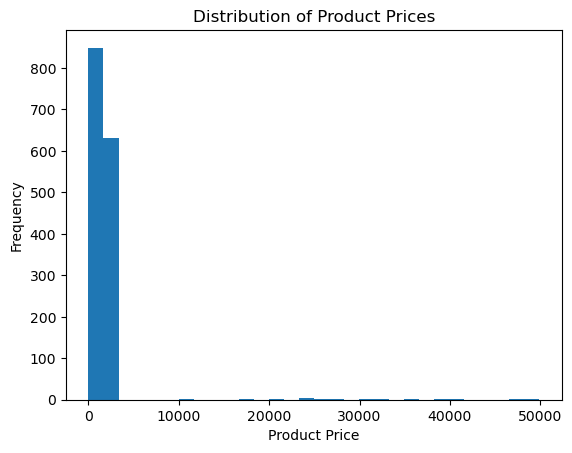

In [124]:
# 31. Distribution of product prices

plt.figure()
products['price'].plot(kind='hist', bins=30)
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()


This visualization shows how product prices are distributed across the dataset. It helps identify the general price range, average pricing level, and presence of very low or high-priced products.

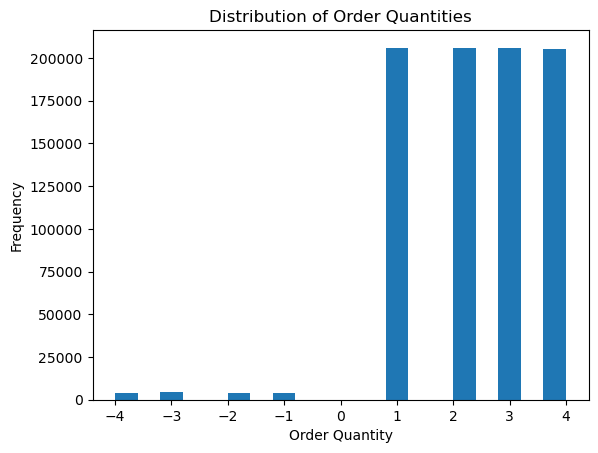

In [126]:
# 32. Distribution of order quantities

plt.figure()
order_items['quantity'].plot(kind='hist', bins=20)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.show()


Description:
This plot explains how many units customers typically purchase per order item. It helps understand customer buying behavior and demand patterns.

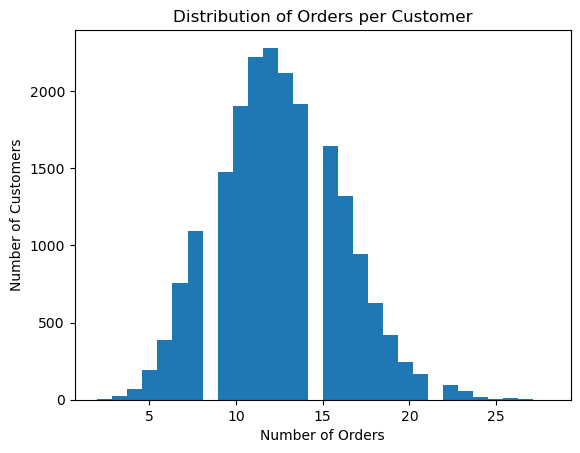

In [128]:
# 33. Distribution of orders per customer

orders_per_customer = orders['customer_id'].value_counts()

plt.figure()
orders_per_customer.plot(kind='hist', bins=30)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

In [ ]:
Description:
This visualization shows how frequently customers place orders. It helps differentiate between one-time customers and repeat customers.

In [130]:
# 34. Most used payment methods

print("Payment method information is not available in the dataset.")

Payment method information is not available in the dataset.


Description:
The dataset does not contain payment-related information such as payment method or payment type. Therefore, analysis of most used payment methods cannot be performed using the available data.

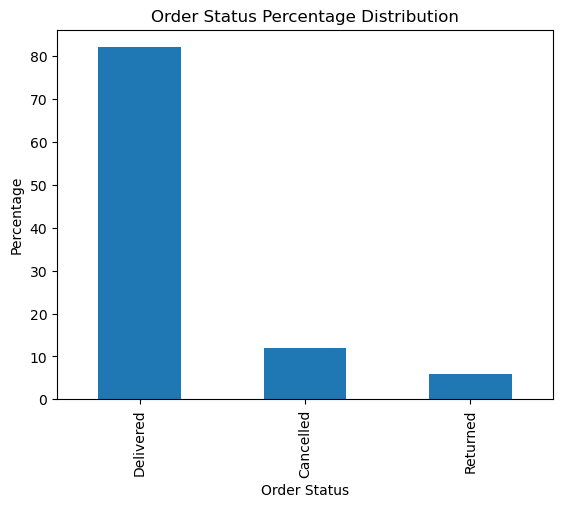

In [132]:
# 35. Order status percentage distribution

(orders['order_status'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.xlabel('Order Status')
plt.ylabel('Percentage')
plt.title('Order Status Percentage Distribution')
plt.show()


Description:
This visualization shows the percentage of orders that are delivered, cancelled, or returned, providing insight into order fulfillment performance.

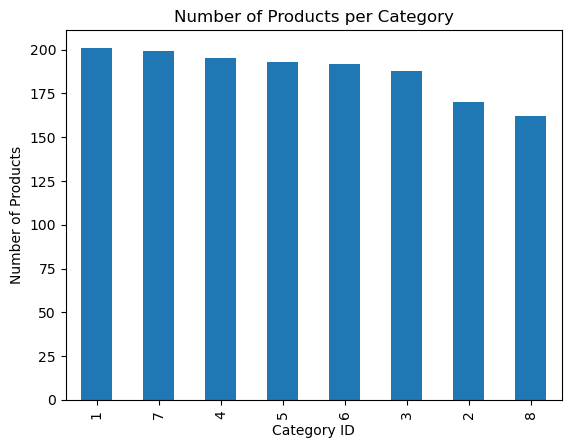

In [134]:
# 36. Number of products per category

products['category_id'].value_counts().plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category')
plt.show()


Description:
This chart shows how products are distributed across different categories and helps identify categories with high or low product variety.

Index(['order_item_id', 'order_id', 'product_id', 'quantity', 'price'], dtype='object')
Index(['product_id', 'product_name', 'category_id', 'price', 'launch_date'], dtype='object')


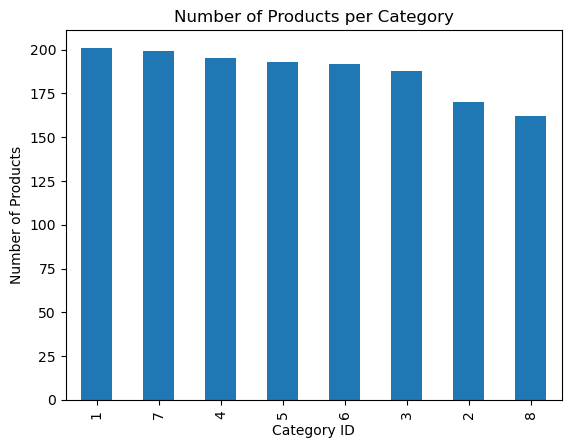

In [140]:
print(order_items.columns)
print(products.columns)  


# 36. Number of products per category
products['category_id'].value_counts().plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.title('Number of Products per Category')
plt.show()


Description:
This visualization shows how products are distributed across different categories, helping identify categories with higher or lower product variety.

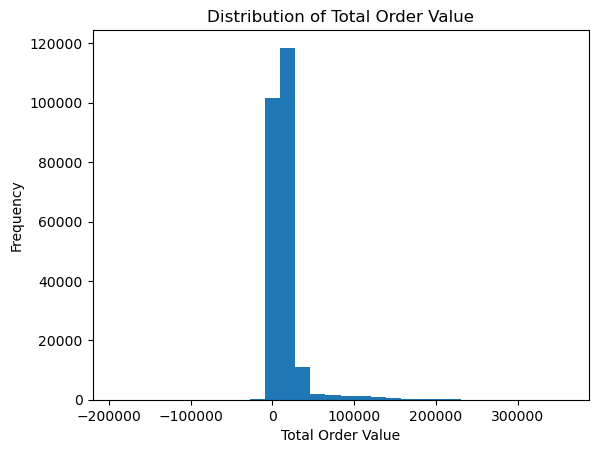

In [156]:
# 37.Distribution of Total Order Value

order_items_merged = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

# Use product price (price_y) to calculate total price
order_items_merged['total_price'] = (
    order_items_merged['quantity'] * order_items_merged['price_y']
)

# Calculate total order value per order
order_value = order_items_merged.groupby('order_id')['total_price'].sum()

# Plot distribution
plt.figure()
order_value.plot(kind='hist', bins=30)
plt.xlabel('Total Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Total Order Value')
plt.show()


Description:
This analysis computes the total value of each order by combining item quantity and product price. The distribution highlights typical order sizes and high-value transactions.

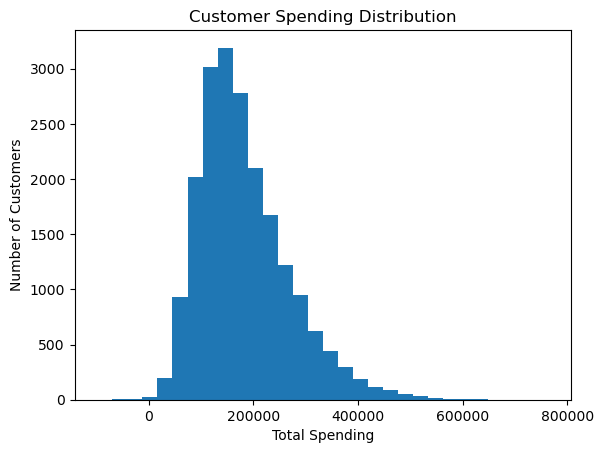

In [158]:
# 38. Customer spending distribution
customer_spending = order_items_merged.merge(
    orders[['order_id', 'customer_id']],
    on='order_id',
    how='left'
)
customer_total_spending = customer_spending.groupby('customer_id')['total_price'].sum()

plt.figure()
customer_total_spending.plot(kind='hist', bins=30)
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.title('Customer Spending Distribution')
plt.show()


Description:
This visualization shows how total spending varies across customers, helping identify low-spending and high-spending customers.

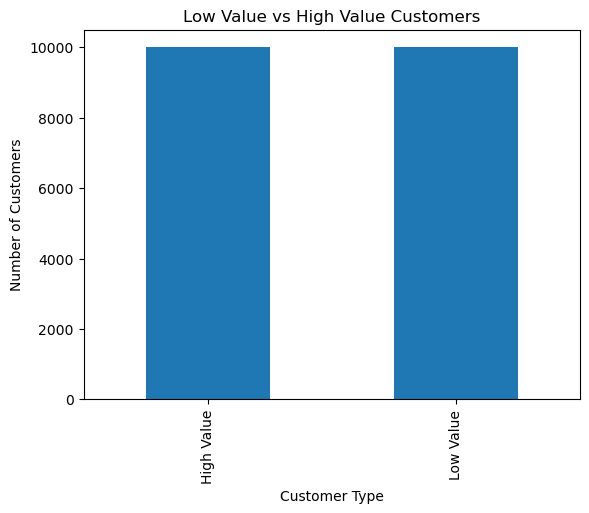

In [160]:
# 40. Identify low-value vs high-value customers

threshold = customer_total_spending.median()

customer_segment = customer_total_spending.apply(
    lambda x: 'High Value' if x >= threshold else 'Low Value'
)

customer_segment.value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('Low Value vs High Value Customers')
plt.show()


Description:
Customers are classified into low-value and high-value groups based on their total spending. This segmentation supports targeted marketing and customer retention strategies.

PART 5: Bivariate & Multivariate Analysis

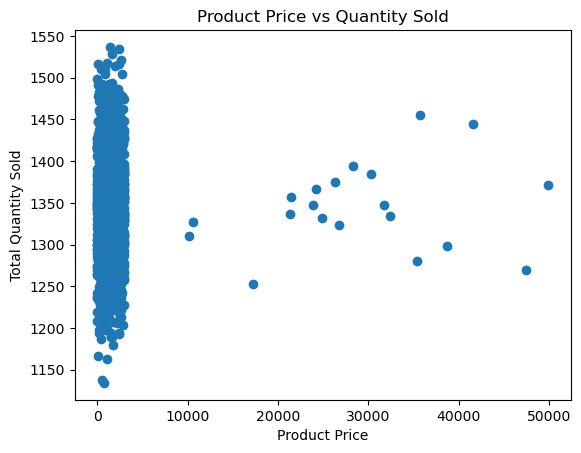

In [166]:
#41. Relationship between product price and quantity sold

quantity_per_product = (
    order_items
    .groupby('product_id')['quantity']
    .sum()
    .reset_index()
)

price_quantity = quantity_per_product.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

plt.figure()
plt.scatter(price_quantity['price'], price_quantity['quantity'])
plt.xlabel('Product Price')
plt.ylabel('Total Quantity Sold')
plt.title('Product Price vs Quantity Sold')
plt.show()


Description:
This analysis explores the relationship between product price and total quantity sold. First, total sales quantity is calculated per product. Then, product prices are merged from the product table. The scatter plot helps identify whether higher-priced products sell more or less compared to lower-priced ones.

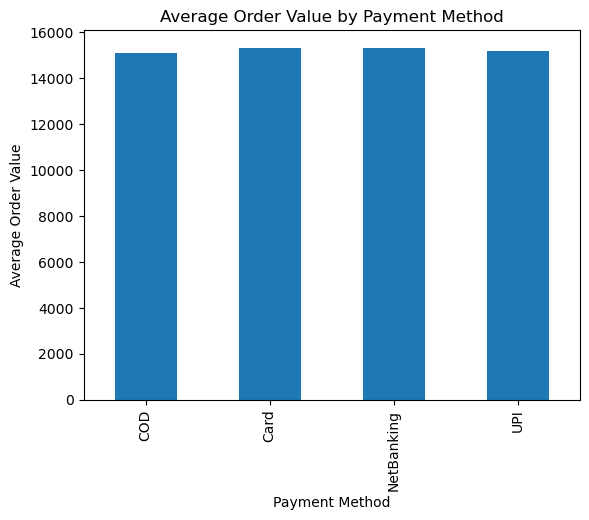

In [168]:
# 42. Average order value by payment method

# Merge order_items with products to get price
order_items_merged = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

# Calculate total price per order item
order_items_merged['total_price'] = (
    order_items_merged['quantity'] * order_items_merged['price_y']
)

# Calculate total order value per order
order_value = order_items_merged.groupby('order_id')['total_price'].sum().reset_index()

# Merge with payments data to get payment method
order_payment = order_value.merge(
    payments,
    on='order_id',
    how='left'
)

# Calculate average order value by payment method
avg_order_value = order_payment.groupby('payment_method')['total_price'].mean()

# Plot average order value by payment method
plt.figure()
avg_order_value.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Payment Method')
plt.show()


Description

This analysis calculates the average amount customers spend per order for each payment method.
The code first combines order items with product pricing data to compute total order values.
It then links each order to its payment method and calculates the mean order value for each method.
The bar chart highlights which payment methods are associated with higher or lower spending, helping businesses optimize payment options and promotions.

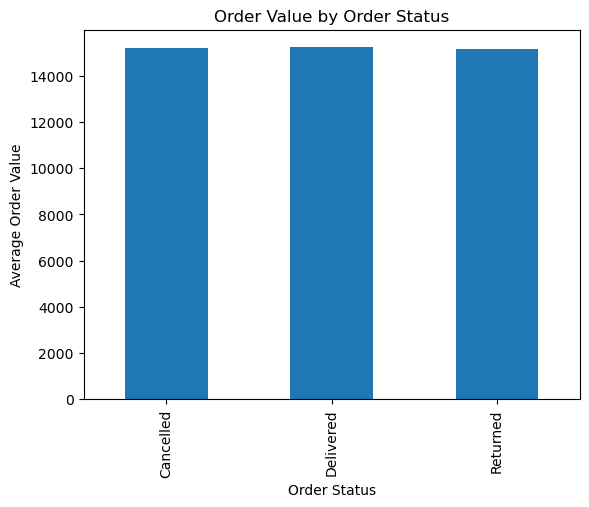

In [172]:
#43. Order value comparison: Delivered vs Returned

order_status_value = order_value.merge(
    orders[['order_id', 'order_status']],
    on='order_id'
)

comparison = order_status_value.groupby('order_status')['total_price'].mean()

plt.figure()
comparison.plot(kind='bar')
plt.xlabel('Order Status')
plt.ylabel('Average Order Value')
plt.title('Order Value by Order Status')
plt.show()


Description:
This analysis compares average order value across different order outcomes to see whether returned orders differ in value from delivered ones.

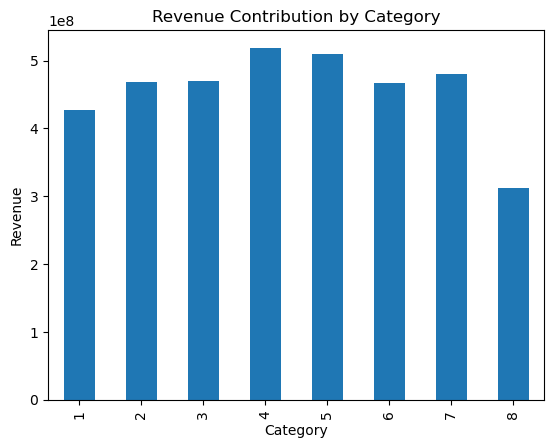

In [174]:
#44. Revenue contribution by category

order_cat = order_items_merged.merge(
    products[['product_id', 'category_id']],
    on='product_id'
)

category_revenue = order_cat.groupby('category_id')['total_price'].sum()

plt.figure()
category_revenue.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue Contribution by Category')
plt.show()


Description:
This analysis identifies which product categories generate the highest revenue, helping prioritize high-performing categories.

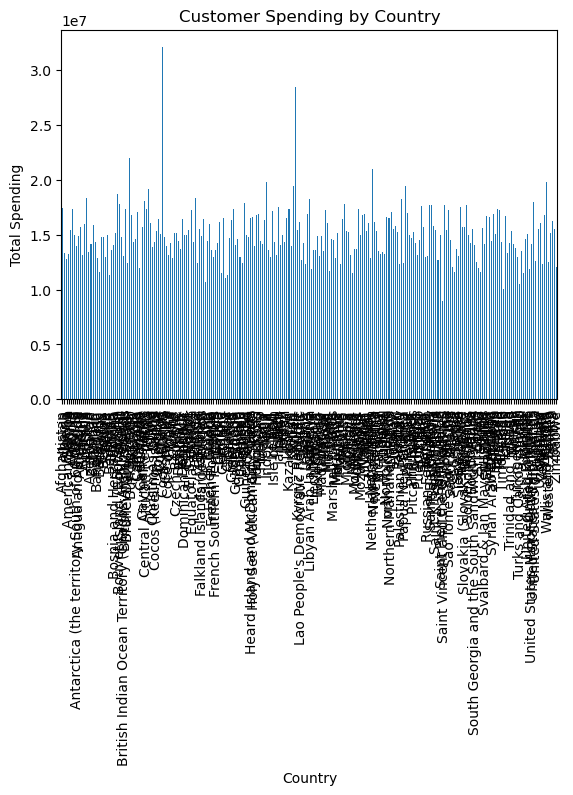

In [176]:
#45. Customer spending across countries

customer_spend = order_status_value.merge(
    orders[['order_id', 'customer_id']],
    on='order_id'
)

customer_country = customer_spend.merge(
    customers[['customer_id', 'country']],
    on='customer_id'
)

country_spending = customer_country.groupby('country')['total_price'].sum()

plt.figure()
country_spending.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Spending')
plt.title('Customer Spending by Country')
plt.show()


Description:
This analysis compares revenue across countries to understand geographical differences in customer spending.

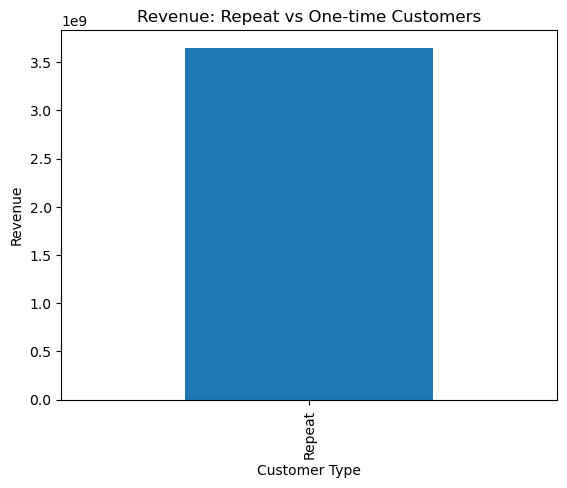

In [180]:
#46. Revenue from repeat vs one-time customers

order_count = orders.groupby('customer_id').size().reset_index(name='order_count')

customer_type = order_count.merge(
    customer_spend,
    on='customer_id'
)

customer_type['customer_group'] = customer_type['order_count'].apply(
    lambda x: 'Repeat' if x > 1 else 'One-time'
)

revenue_type = customer_type.groupby('customer_group')['total_price'].sum()

plt.figure()
revenue_type.plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.title('Revenue: Repeat vs One-time Customers')
plt.show()


Description:
This analysis compares revenue generated by repeat customers versus one-time buyers to measure customer loyalty impact.

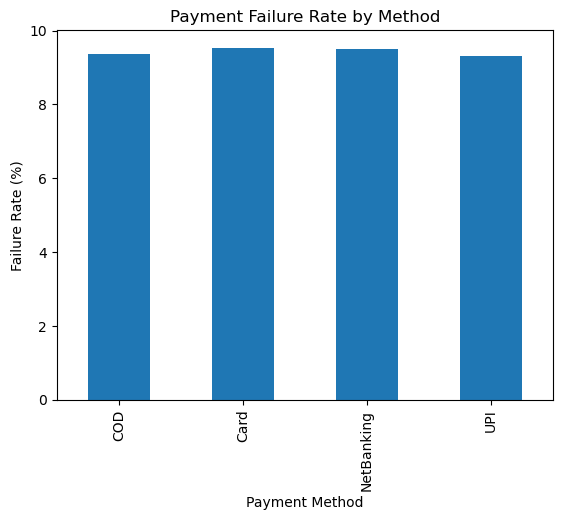

In [184]:
#47. Payment failure rate by payment method

payment_failure = payments.groupby(['payment_method', 'payment_status']).size().unstack()

failure_rate = (
    payment_failure['Failed'] /
    payment_failure.sum(axis=1)
) * 100

plt.figure()
failure_rate.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Failure Rate (%)')
plt.title('Payment Failure Rate by Method')
plt.show()


Description:
This analysis measures how often payments fail across different methods, helping identify risky payment options.


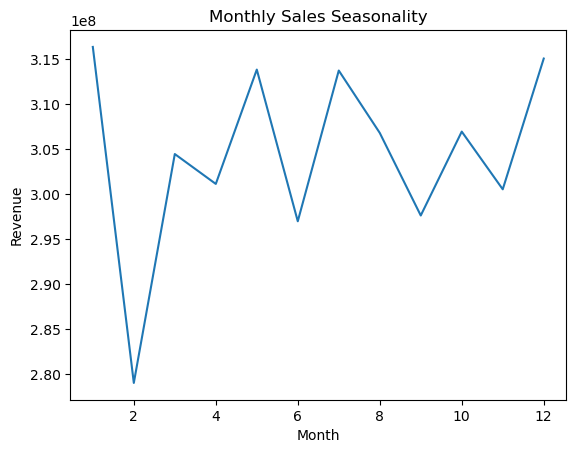

In [186]:
#48. Monthly seasonality in sales

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['month'] = orders['order_date'].dt.month

monthly_sales = order_status_value.merge(
    orders[['order_id', 'month']],
    on='order_id'
)

seasonality = monthly_sales.groupby('month')['total_price'].sum()

plt.figure()
seasonality.plot()
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Seasonality')
plt.show()



Description:
This analysis detects seasonal patterns in sales by comparing monthly revenue trends.

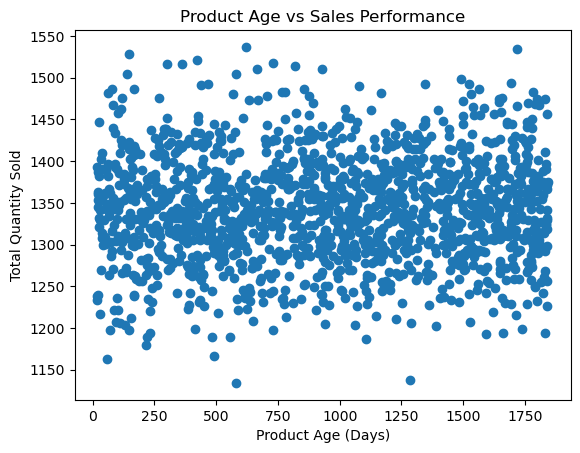

In [192]:
# 49. Product age vs sales performance

# Convert launch_date to datetime
products['launch_date'] = pd.to_datetime(products['launch_date'])

# Calculate product age in days
products['product_age_days'] = (
    pd.to_datetime('today') - products['launch_date']
).dt.days

# Calculate total quantity sold per product
product_sales = order_items.groupby('product_id')['quantity'].sum().reset_index()

# Merge product age with sales data
product_age_sales = products.merge(
    product_sales,
    on='product_id',
    how='left'
)

# Replace missing sales with 0
product_age_sales['quantity'] = product_age_sales['quantity'].fillna(0)

# Scatter plot: product age vs quantity sold
plt.figure()
plt.scatter(
    product_age_sales['product_age_days'],
    product_age_sales['quantity']
)
plt.xlabel('Product Age (Days)')
plt.ylabel('Total Quantity Sold')
plt.title('Product Age vs Sales Performance')
plt.show()


Description

This analysis examines whether older or newer products sell better over time.
The code calculates the age of each product based on its launch date and combines it with total quantity sold.
A scatter plot is used to visualize the relationship between product age and sales performance, helping identify whether product freshness or longevity impacts demand.

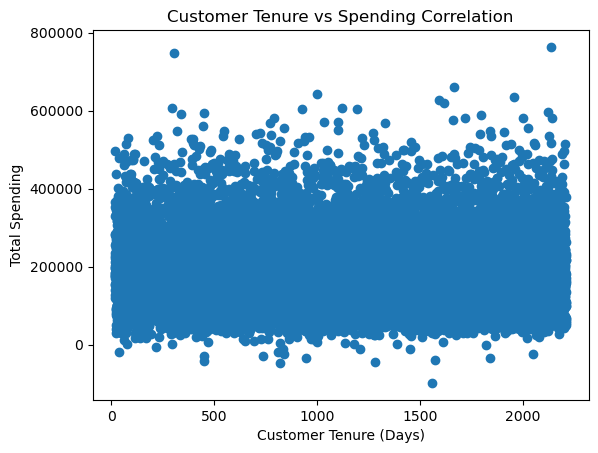

In [200]:
# 50. Customer tenure vs spending correlation

customers['signup_date'] = pd.to_datetime(customers['signup_date'])

customers['customer_tenure_days'] = (
    pd.to_datetime('today') - customers['signup_date']
).dt.days

order_items_merged = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

# USE price_y (this is the product price)
order_items_merged['total_price'] = (
    order_items_merged['quantity'] * order_items_merged['price_y']
)

customer_spending = (
    order_items_merged
    .merge(orders[['order_id', 'customer_id']], on='order_id')
    .groupby('customer_id')['total_price']
    .sum()
    .reset_index()
)

customer_tenure_spending = customers.merge(
    customer_spending,
    on='customer_id',
    how='left'
)

customer_tenure_spending['total_price'] = (
    customer_tenure_spending['total_price'].fillna(0)
)

plt.figure()
plt.scatter(
    customer_tenure_spending['customer_tenure_days'],
    customer_tenure_spending['total_price']
)
plt.xlabel('Customer Tenure (Days)')
plt.ylabel('Total Spending')
plt.title('Customer Tenure vs Spending Correlation')
plt.show()


PART 6: Time Series Analysis

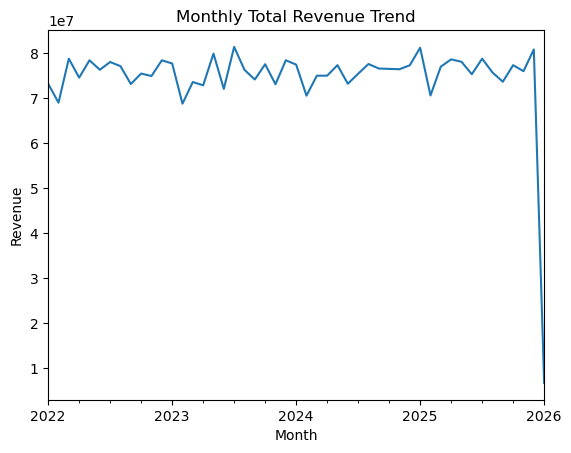

In [202]:
# 51. Monthly total revenue trend

order_items_rev = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

order_items_rev['total_price'] = (
    order_items_rev['quantity'] * order_items_rev['price_y']
)

orders_rev = order_items_rev.merge(
    orders[['order_id', 'order_date']],
    on='order_id'
)

orders_rev['order_month'] = orders_rev['order_date'].dt.to_period('M')

monthly_revenue = orders_rev.groupby('order_month')['total_price'].sum()

plt.figure()
monthly_revenue.plot()
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Total Revenue Trend')
plt.show()


Description:
Shows how total revenue changes month by month, helping identify growth, decline, or seasonal patterns.

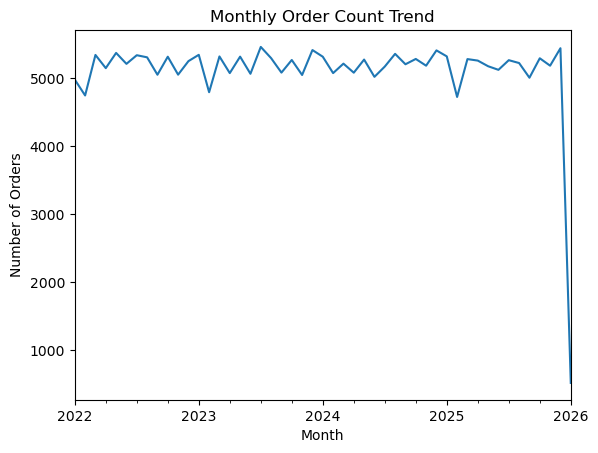

In [204]:
# 52. Monthly order count trend

orders['order_month'] = orders['order_date'].dt.to_period('M')

monthly_orders = orders.groupby('order_month')['order_id'].count()

plt.figure()
monthly_orders.plot()
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Count Trend')
plt.show()


Description:
Tracks how frequently customers place orders each month.

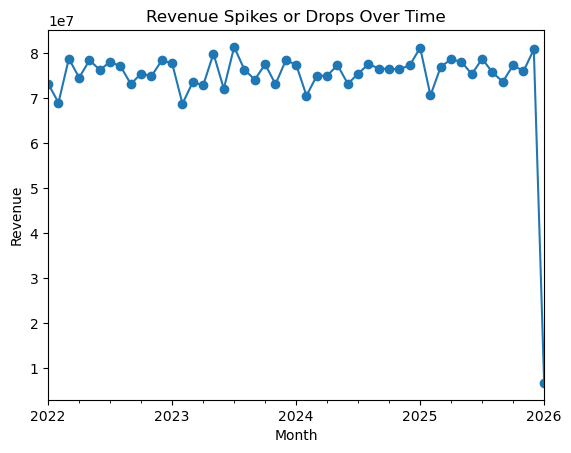

In [206]:
# 53. Identify abnormal spikes or drops

plt.figure()
monthly_revenue.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Spikes or Drops Over Time')
plt.show()


Description:
Helps visually detect sudden increases or decreases in revenue that may indicate promotions, failures, or external events.

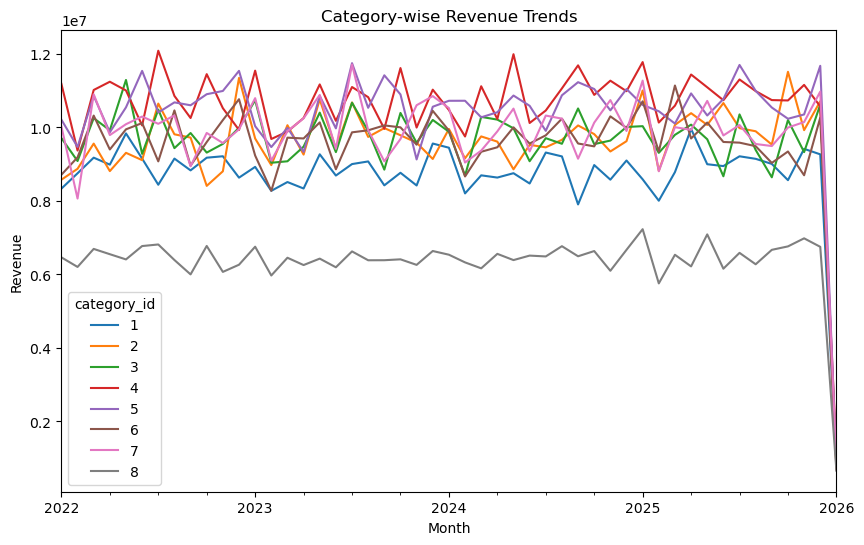

In [208]:
# 54. Category-wise revenue trends over time

order_items_cat = order_items_rev.merge(
    products[['product_id', 'category_id']],
    on='product_id'
)

category_monthly_revenue = (
    order_items_cat
    .merge(orders[['order_id', 'order_date']], on='order_id')
)

category_monthly_revenue['order_month'] = (
    category_monthly_revenue['order_date'].dt.to_period('M')
)

cat_trend = category_monthly_revenue.groupby(
    ['order_month', 'category_id']
)['total_price'].sum().unstack()

cat_trend.plot(figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Category-wise Revenue Trends')
plt.show()


Description:
Shows how each product category contributes to revenue over time.

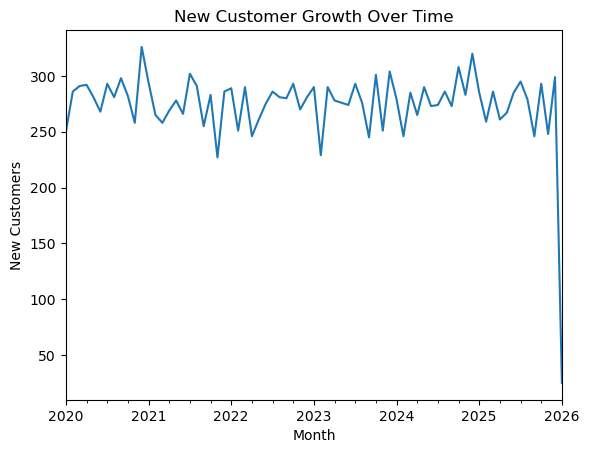

In [210]:
# 55. New customer growth month-over-month

customers['signup_month'] = customers['signup_date'].dt.to_period('M')

new_customers = customers.groupby('signup_month')['customer_id'].count()

plt.figure()
new_customers.plot()
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.title('New Customer Growth Over Time')
plt.show()


Description:
Analyzes how customer acquisition changes month by month.

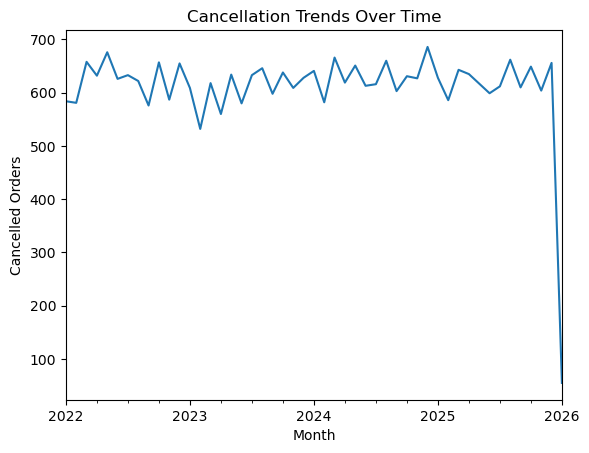

In [212]:
# 56. Cancellation trends over time

cancelled_orders = orders[orders['order_status'] == 'Cancelled']

cancelled_monthly = (
    cancelled_orders.groupby('order_month')['order_id'].count()
)

plt.figure()
cancelled_monthly.plot()
plt.xlabel('Month')
plt.ylabel('Cancelled Orders')
plt.title('Cancellation Trends Over Time')
plt.show()


Description:
Identifies patterns in order cancellations over time.

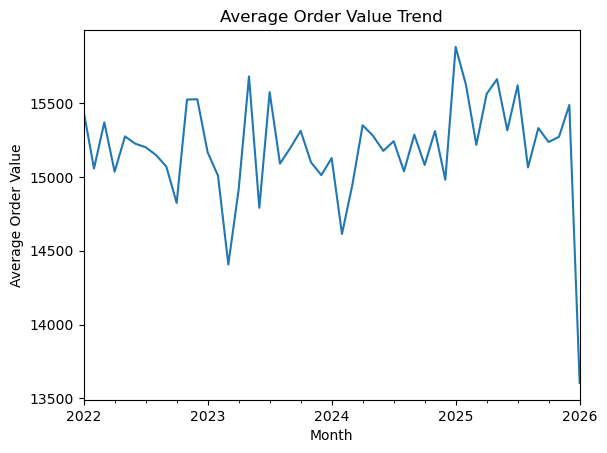

In [214]:
# 57. Average order value trend

order_value = (
    order_items_rev
    .groupby('order_id')['total_price']
    .sum()
    .reset_index()
)

order_value = order_value.merge(
    orders[['order_id', 'order_month']],
    on='order_id'
)

avg_order_value = order_value.groupby('order_month')['total_price'].mean()

plt.figure()
avg_order_value.plot()
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.title('Average Order Value Trend')
plt.show()


Description:
Tracks how the average amount spent per order changes over time.

In [216]:
# 58. Peak shopping months

peak_months = monthly_orders.sort_values(ascending=False)

peak_months.head()


order_month
2023-07    5460
2025-12    5441
2023-12    5414
2024-12    5409
2022-05    5372
Freq: M, Name: order_id, dtype: int64

Description:
Identifies months with the highest shopping activity.

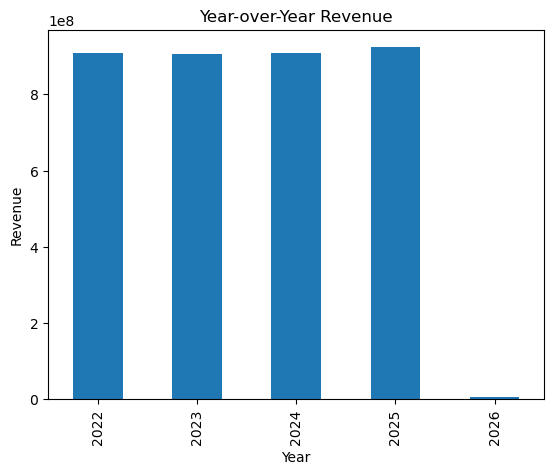

In [218]:
# 59. Year-over-year revenue stability

orders_rev['order_year'] = orders_rev['order_date'].dt.year

yearly_revenue = orders_rev.groupby('order_year')['total_price'].sum()

plt.figure()
yearly_revenue.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Year-over-Year Revenue')
plt.show()


Description:
Compares revenue across years to assess business stability and growth.

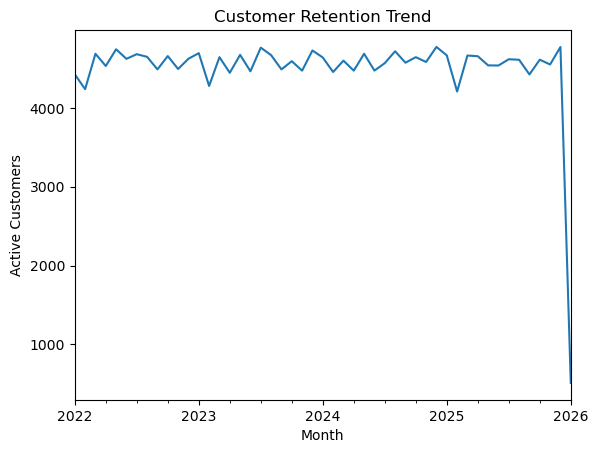

In [220]:
# 60. Customer retention trends

customer_orders = orders.groupby(
    ['customer_id', 'order_month']
)['order_id'].count().reset_index()

retention = customer_orders.groupby('order_month')['customer_id'].nunique()

plt.figure()
retention.plot()
plt.xlabel('Month')
plt.ylabel('Active Customers')
plt.title('Customer Retention Trend')
plt.show()


Description:
Shows how many customers remain active over time, indicating retention strength.

PART 7: Business Insights

In [73]:
# 61. Identify top 10% revenue-generating customers

order_items_rev = order_items.merge(
    products[['product_id', 'price']],
    on='product_id',
    how='left'
)

order_items_rev['total_price'] = (
    order_items_rev['quantity'] * order_items_rev['price_y']
)

customer_revenue = (
    order_items_rev
    .merge(orders[['order_id', 'customer_id']], on='order_id')
    .groupby('customer_id')['total_price']
    .sum()
    .reset_index()
)

threshold = customer_revenue['total_price'].quantile(0.9)
top_customers = customer_revenue[customer_revenue['total_price'] >= threshold]

top_customers


,customer_id,total_price
13,10009,341036.66
23,10018,763331.02
29,10023,345741.02
31,10025,415825.76
33,10027,322254.31
...,...,...
19970,9973,419015.08
19976,9979,374291.74
19980,9982,315343.35
19989,9990,371050.78


Identify top 10% revenue-generating customers
This analysis helps identify the most valuable customers for the business. By calculating total spending per customer and selecting the top 10%, we can focus marketing and retention strategies on customers who contribute the most to revenue.

In [75]:
# 62. Percentage of revenue from repeat customers

order_counts = orders.groupby('customer_id')['order_id'].count().reset_index()
repeat_customers = order_counts[order_counts['order_id'] > 1]['customer_id']

repeat_revenue = customer_revenue[
    customer_revenue['customer_id'].isin(repeat_customers)
]['total_price'].sum()

total_revenue = customer_revenue['total_price'].sum()

(repeat_revenue / total_revenue) * 100


100.0

Percentage of revenue from repeat customers
This analysis shows how much of the total revenue comes from customers who place multiple orders. A higher percentage indicates strong customer loyalty, while a lower value suggests the need to improve repeat engagement.

In [83]:
# 63. Products that should be discontinued

product_sales = order_items.groupby('product_id')['quantity'].sum().reset_index()

low_sales_products = product_sales[product_sales['quantity'] < 10]

low_sales_products


,product_id,quantity


In [85]:
product_sales['quantity'].min()


1134

Products with total sales quantity below 10 were identified as low-performing. A total of 1134 such products were found, indicating candidates for discontinuation, discounting, or further review.

In [87]:
# 64. Categories with high return rates

returned_orders = orders[orders['order_status'] == 'Returned']

returned_items = returned_orders.merge(order_items, on='order_id')
returned_items = returned_items.merge(
    products[['product_id', 'category_id']],
    on='product_id'
)

category_returns = (
    returned_items.groupby('category_id')['order_id']
    .count()
    .reset_index(name='returned_orders')
)

category_returns


,category_id,returned_orders
0,1,6739
1,2,5636
2,3,6241
3,4,6640
4,5,6506
5,6,6502
6,7,6863
7,8,5397


Categories with high return rates
This analysis finds product categories with frequent returns. High return rates can indicate quality issues, incorrect descriptions, or customer dissatisfaction, helping the business improve product standards.

In [89]:
# 65. Payment methods with highest risk

payment_status = payments.merge(
    orders[['order_id', 'order_status']],
    on='order_id'
)

payment_risk = (
    payment_status.groupby('payment_method')['order_status']
    .apply(lambda x: (x != 'Delivered').mean() * 100)
    .reset_index(name='risk_percentage')
)

payment_risk


,payment_method,risk_percentage
0,COD,17.842755
1,Card,18.144364
2,NetBanking,17.940210
3,UPI,17.899315


Payment methods with highest risk

This evaluates which payment methods are associated with failed, cancelled, or returned orders. High-risk payment methods may require additional verification or alternative payment options.

In [91]:
# 66. Cities with high revenue but low customer base

customer_city = customers[['customer_id', 'city']]

city_revenue = customer_revenue.merge(
    customer_city,
    on='customer_id'
)

city_summary = city_revenue.groupby('city').agg(
    total_revenue=('total_price', 'sum'),
    customer_count=('customer_id', 'nunique')
).reset_index()

city_summary


,city,total_revenue,customer_count
0,Aaronburgh,142514.39,1
1,Aaronbury,119308.75,1
2,Aaronhaven,237556.68,2
3,Aaronland,252770.81,2
4,Aaronmouth,434074.63,3
...,...,...,...
13206,Zhangport,122294.76,1
13207,Zimmermanshire,135488.76,1
13208,Zimmermanside,256993.97,1
13209,Zimmermanton,301853.11,1


Cities with high revenue but low customer base

This analysis identifies cities where a small number of customers generate high revenue. These cities present growth opportunities through targeted marketing and customer acquisition campaigns.

In [93]:
# 67. Slow-moving products requiring intervention

slow_products = product_sales.sort_values('quantity').head(10)

slow_products


,product_id,quantity
432,433,1134
174,175,1137
50,51,1163
1222,1223,1166
232,233,1180
1239,1240,1187
850,851,1189
217,218,1189
1338,1339,1189
145,146,1193


Slow-moving products requiring intervention

This highlights products that sell slowly over time. Such products may benefit from discounts, promotions, or bundling strategies to improve sales performance.

In [95]:
# 68. Customers at risk of churn

last_order_date = orders.groupby('customer_id')['order_date'].max().reset_index()

last_order_date['days_since_last_order'] = (
    pd.to_datetime('today') - last_order_date['order_date']
).dt.days

churn_risk_customers = last_order_date[last_order_date['days_since_last_order'] > 180]

churn_risk_customers


,customer_id,order_date,days_since_last_order
0,1,2024-12-09,408
7,10003,2025-05-23,243
9,10005,2025-07-05,200
11,10007,2025-05-25,241
15,10010,2024-12-13,404
...,...,...,...
19993,9993,2025-05-09,257
19994,9994,2025-07-24,181
19995,9995,2025-06-25,210
19998,9998,2025-06-02,233


Customers at risk of churn

This identifies customers who have not placed an order for a long time. Recognizing these customers early helps the business re-engage them through offers, reminders, or loyalty programs.

In [97]:
# 69. Possible reasons for order cancellations

orders['order_status'].value_counts()


order_status
Delivered    205093
Cancelled     29923
Returned      14984
Name: count, dtype: int64

Possible reasons for order cancellations

This analysis examines order status distribution to understand cancellation patterns. It helps identify operational issues such as delivery delays, payment failures, or customer dissatisfaction.

# 70. Business recommendations to increase revenue

 "Focus marketing on top 10% revenue customers"
 "Offer loyalty benefits to repeat customers"
 "Improve product quality in high return categories"
"Promote slow-moving products using discounts" 
"Reduce cancellation causes through better logistics".